<a href="https://colab.research.google.com/github/aiformankind/lets-stop-wildfires-hackathon/blob/master/Challenge_1B_WildfireSmokeImageClassifierForDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Let's Stop Wildfire Hackathon**
organized by AI For Mankind

This is a somple notebook to train a wildfire smoke classifier for Wildfire Smoke Detection Challenge 1B 

https://github.com/aiformankind/lets-stop-wildfires-hackathon/blob/master/wildfire_smoke_challenge_1B.md

**Check Tensorflow version and load Tensorboard notebook extension**

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

TensorFlow 2.x selected.


**Verify GPU Device**

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Download wildfire smoke image dataset: gridded version**


In [0]:
!wget "https://www.dropbox.com/s/rl0qbub4clah2w9/grid_version.tar"

--2020-02-10 03:50:52--  https://www.dropbox.com/s/rl0qbub4clah2w9/grid_version.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rl0qbub4clah2w9/grid_version.tar [following]
--2020-02-10 03:50:52--  https://www.dropbox.com/s/raw/rl0qbub4clah2w9/grid_version.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uced7701cb13b8af3249074da380.dl.dropboxusercontent.com/cd/0/inline/Ax1Cb1kudM3DYdAt2P_qaSpk543__kVyz8pqAKDmCcy_h6RDrXOacTN1wTtP-1gVg1vEyjQAbi7f35OinKL7qjtqVRSQcnP45NC2_qlqNixoNalH3yNT6wFozp6-p9_QncE/file# [following]
--2020-02-10 03:50:53--  https://uced7701cb13b8af3249074da380.dl.dropboxusercontent.com/cd/0/inline/Ax1Cb1kudM3DYdAt2P_qaSpk543__kVyz8pqAKDmCcy_h6RDrXOacTN1wTtP-1gVg1vEyjQAbi7f35OinKL7qjtqVRSQcnP45NC2_q

**Extract the wildfire smoke dataset: gridded version**

In [0]:
!tar -xvf 'grid_version.tar'

grid_version/
grid_version/validate/
grid_version/.DS_Store
grid_version/train/
grid_version/train/grid_no_smoke/
grid_version/train/.DS_Store
grid_version/train/grid_smoke/
grid_version/train/grid_smoke/1529002100_+01140_05_03.png
grid_version/train/grid_smoke/1529003240_+02280_05_03.png
grid_version/train/grid_smoke/1499547403_+01140_03_06.png
grid_version/train/grid_smoke/1499547763_+01500_05_07.png
grid_version/train/grid_smoke/1529002880_+01920_05_03.png
grid_version/train/grid_smoke/1528759446_+02040_06_08.png
grid_version/train/grid_smoke/1528759506_+02100_06_04.png
grid_version/train/grid_smoke/1498418253_+01860_05_08.png
grid_version/train/grid_smoke/1498418493_+02100_04_09.png
grid_version/train/grid_smoke/1529001560_+00600_06_04.png
grid_version/train/grid_smoke/1499547283_+01020_04_06.png
grid_version/train/grid_smoke/1528759686_+02280_05_06.png
grid_version/train/grid_smoke/1529022805_+02100_05_05.png
grid_version/train/grid_smoke/1530740065_+01020_04_07.png
grid_version/t

**Specify the train and validate folders**

In [0]:
train_input_folder ='grid_version/train'
validate_input_folder = 'grid_version/validation'


**Create train and validation splits**

In [0]:
from imutils import paths
import os
import shutil
import random

def split_data(directory, validate_directory='validation', split=0.8): 
  directories = [os.path.join(directory, o) for o in os.listdir(directory) 
                    if os.path.isdir(os.path.join(directory,o))]
  for directory in directories:
    image_paths = list(paths.list_images(directory))
    
    random.seed(32)
    random.shuffle(image_paths)
    image_paths
   
    # compute the training and testing split
    i = int(len(image_paths) * split)    
    train_paths = image_paths[:i]
    selected_for_validation_paths = image_paths[i:]
    for path in selected_for_validation_paths:
       category = os.path.basename(os.path.normpath(directory))
       dest_path = os.path.join(validate_directory, category)
       if not os.path.exists(dest_path):
           os.makedirs(dest_path)
       shutil.move(path, dest_path)   

  


In [0]:
!ls grid_version/train

grid_no_smoke  grid_smoke


In [0]:
split_data(directory='grid_version/train/', validate_directory='grid_version/validation')  

In [0]:
!ls grid_version/validation/grid_smoke

1498416813_+00420_05_08.png  1528758846_+01440_06_05.png
1498416873_+00480_05_08.png  1528759026_+01620_05_06.png
1498417413_+01020_05_09.png  1528759026_+01620_06_06.png
1498417713_+01320_05_08.png  1528759086_+01680_06_05.png
1498417773_+01380_05_08.png  1528759086_+01680_06_06.png
1498417833_+01440_05_08.png  1528759146_+01740_06_03.png
1498417893_+01500_05_08.png  1528759206_+01800_05_08.png
1498417953_+01560_05_08.png  1528759206_+01800_06_07.png
1498418013_+01620_05_08.png  1528759266_+01860_06_05.png
1498418193_+01800_05_08.png  1528759326_+01920_05_07.png
1498418373_+01980_04_08.png  1528759386_+01980_05_06.png
1498418433_+02040_05_08.png  1528759446_+02040_05_08.png
1498418433_+02040_05_09.png  1528759446_+02040_06_08.png
1499546803_+00540_04_06.png  1528759506_+02100_05_07.png
1499546863_+00600_05_06.png  1528759566_+02160_05_03.png
1499546923_+00660_04_07.png  1528759566_+02160_06_09.png
1499546923_+00660_05_05.png  1528759626_+02220_05_07.png
1499547043_+00780_04_06.png  15

In [0]:
!ls grid_version/validation/grid_no_smoke

1498416633_+00240_01_01.png  1498417593_+01200_04_03.png
1498416633_+00240_03_01.png  1498417593_+01200_04_04.png
1498416633_+00240_03_07.png  1498417593_+01200_04_05.png
1498416633_+00240_03_08.png  1498417593_+01200_04_06.png
1498416633_+00240_04_07.png  1498417593_+01200_05_01.png
1498416633_+00240_05_02.png  1498417593_+01200_05_05.png
1498416633_+00240_05_07.png  1498417593_+01200_06_02.png
1498416633_+00240_06_02.png  1498417593_+01200_06_07.png
1498416633_+00240_06_06.png  1498417593_+01200_08_07.png
1498416633_+00240_06_07.png  1498417593_+01200_08_08.png
1498416633_+00240_06_08.png  1498417593_+01200_09_03.png
1498416633_+00240_08_06.png  1498417653_+01260_01_02.png
1498416633_+00240_08_08.png  1498417653_+01260_01_04.png
1498416633_+00240_09_04.png  1498417653_+01260_01_05.png
1498416633_+00240_09_06.png  1498417653_+01260_01_08.png
1498416693_+00300_01_02.png  1498417653_+01260_02_08.png
1498416693_+00300_01_05.png  1498417653_+01260_03_04.png
1498416693_+00300_01_07.png  14

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#apply image augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],
    rotation_range=40)
    
validate_image_generator = ImageDataGenerator(rescale=1./255)



**Create train and validate data generators**


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#apply image augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],
    rotation_range=40)
   
validate_image_generator = ImageDataGenerator(rescale=1./255)



In [0]:
batch_size = 40
image_width = 224
image_height = 224
IMAGE_WIDTH_HEIGHT = (image_width, image_height)

class_mode = 'categorical'

#create train data generator flowing from train_input_folder
train_generator = train_image_generator.flow_from_directory(
            train_input_folder,
            target_size=IMAGE_WIDTH_HEIGHT,
            batch_size=batch_size,
            class_mode=class_mode)
            
#create validation data generator flowing from validate_input_folder
validation_generator = train_image_generator.flow_from_directory(
        validate_input_folder,
        target_size=IMAGE_WIDTH_HEIGHT,
        batch_size=batch_size,
        class_mode=class_mode)
        

Found 2896 images belonging to 2 classes.
Found 725 images belonging to 2 classes.


**Create custom model**

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

#total_classes = 1
#activation_function = 'sigmoid'
#loss = 'binary_crossentropy'

total_classes = 2
activation_function = 'softmax'
loss = 'categorical_crossentropy'


img_input = layers.Input(shape=(image_width, image_height, 3))

x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(total_classes, activation= activation_function)(x)

model = Model(img_input, output)

model.compile(loss=loss,
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

**Start model training**

In [0]:
import datetime, os
import tensorflow as tf

epochs = 10
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

logdir = os.path.join("tf_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      validation_data=validation_generator,
      validation_steps=validation_steps,
      epochs=epochs,
      callbacks=[tensorboard_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 72 steps, validate for 18 steps
Epoch 1/10
72/72 [==============================] - 62s 861ms/step - loss: 0.9057 - accuracy: 0.7066 - val_loss: 0.4151 - val_accuracy: 0.7194
Epoch 2/10
72/72 [==============================] - 55s 770ms/step - loss: 0.4181 - accuracy: 0.7314 - val_loss: 0.3797 - val_accuracy: 0.7819
Epoch 3/10
72/72 [==============================] - 56s 772ms/step - loss: 0.3815 - accuracy: 0.7952 - val_loss: 0.3390 - val_accuracy: 0.8639
Epoch 4/10
72/72 [==============================] - 56s 774ms/step - loss: 0.3592 - accuracy: 0.8193 - val_loss: 0.3890 - val_accuracy: 0.7903
Epoch 5/10
72/72 [==============================] - 56s 784ms/step - loss: 0.3509 - accuracy: 0.8011 - val_loss: 0.3708 - val_accuracy: 0.7722
Epoch 6/10
72/72 [==============================] - 57s 789ms/step - loss: 0.3707 - accuracy: 0.7672 - val_loss: 0.34

Text(0.5, 0, 'epoch')

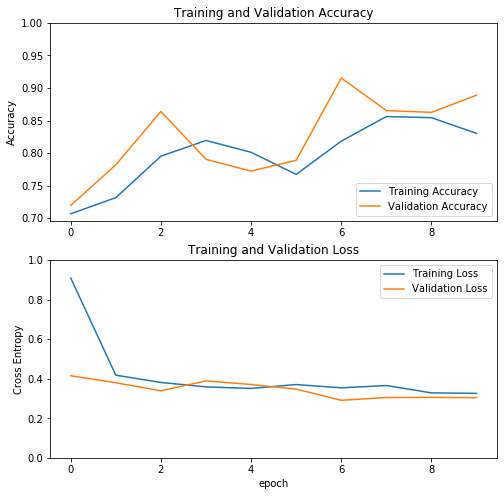

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

In [0]:
%tensorboard --logdir tf_logs


<IPython.core.display.Javascript object>

**Transfer learning using VGG19 as base model**

In [0]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
#create a base model
image_width=224
image_height=224
IMAGE_SHAPE = (image_width, image_height, 3)
base_model = tf.keras.applications.VGG19(input_shape=IMAGE_SHAPE, include_top=False,weights='imagenet')


Using TensorFlow backend.


80142336/80134624 [==============================] - 1s 0us/step


In [0]:
keras = tf.keras
IMAGE_WIDTH_HEIGHT = (image_width, image_height)
batch_size=40

#class_mode='binary'

#total_classes = 1
#activation_function = 'sigmoid'
#loss = 'binary_crossentropy'

class_mode = 'categorical'
total_classes = 2
activation_function = 'softmax'
loss = 'categorical_crossentropy'


train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=keras.applications.vgg19.preprocess_input,
            rescale=1.0/255.0,
            shear_range=0.2, 
            zoom_range=[0.9, 1.25],
            brightness_range=[0.5, 1.5],
            horizontal_flip=True,
            vertical_flip=True)

     
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=keras.applications.vgg19.preprocess_input,
            rescale=1.0/255.0)


train_generator = train_image_generator.flow_from_directory(
            train_input_folder,
            target_size=IMAGE_WIDTH_HEIGHT,
            batch_size=batch_size,
            class_mode=class_mode)

validation_generator = validation_image_generator.flow_from_directory(
            validate_input_folder,
            target_size=IMAGE_WIDTH_HEIGHT,
            batch_size=batch_size,
            class_mode=class_mode)

Found 2896 images belonging to 2 classes.
Found 725 images belonging to 2 classes.


**Freeze the base model. Only train the top prediction layer.**
The weights of the pre-trained network were not updated during training.

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
import os

reload_checkpoint=True
img_input = layers.Input(shape=(image_width, image_height, 3))
global_average_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(total_classes, activation=activation_function)

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])


print("Number of layers in the base model: ", len(base_model.layers))

base_model.trainable = False

model.compile(loss=loss,
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()


Number of layers in the base model:  22
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 20,025,410
Trainable params: 1,026
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
import datetime, os

epochs = 20
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

logdir = os.path.join("tf_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


history = model.fit_generator(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      validation_data=validation_generator,
      validation_steps=validation_steps,
      callbacks=[tensorboard_callback],
      epochs=epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 72 steps, validate for 18 steps
Epoch 1/20
72/72 [==============================] - 53s 741ms/step - loss: 0.5590 - accuracy: 0.7202 - val_loss: 0.5352 - val_accuracy: 0.7236
Epoch 2/20
72/72 [==============================] - 49s 675ms/step - loss: 0.4929 - accuracy: 0.7234 - val_loss: 0.4860 - val_accuracy: 0.7236
Epoch 3/20
72/72 [==============================] - 48s 672ms/step - loss: 0.4519 - accuracy: 0.7405 - val_loss: 0.4497 - val_accuracy: 0.7431
Epoch 4/20
72/72 [==============================] - 48s 670ms/step - loss: 0.4209 - accuracy: 0.7826 - val_loss: 0.4199 - val_accuracy: 0.7972
Epoch 5/20
72/72 [==============================] - 48s 670ms/step - loss: 0.3998 - accuracy: 0.8088 - val_loss: 0.3959 - val_accuracy: 0.8333
Epoch 6/20
72/72 [==============================] - 48s 673ms/step - loss: 0.3796 - accuracy: 0.8347 - val_loss: 0.37

Text(0.5, 0, 'epoch')

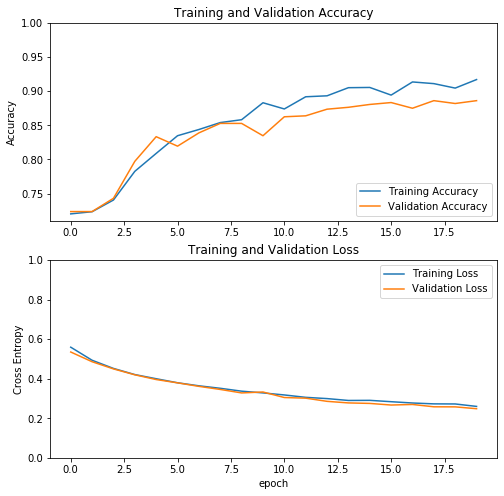

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

**Fine-tune a small number of top layers**

In [0]:
import datetime, os

loss = 'binary_crossentropy'


base_model.trainable = True

# Fine tune start from layer 13
fine_tune_at = 13

# Freeze all layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
     layer.trainable = False

model.compile(loss=loss,
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_1 ( multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  513       
Total params: 20,024,897
Trainable params: 513
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
import datetime, os

epochs = 30
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

logdir = os.path.join("tf_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      validation_data=validation_generator,
      validation_steps=validation_steps,
      callbacks=[tensorboard_callback],
      epochs=epochs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 18 steps
Epoch 1/30
90/90 [==============================] - 65s 720ms/step - loss: 0.2878 - accuracy: 0.9023 - val_loss: 0.2764 - val_accuracy: 0.8708
Epoch 2/30
90/90 [==============================] - 63s 698ms/step - loss: 0.2810 - accuracy: 0.9084 - val_loss: 0.2704 - val_accuracy: 0.8708
Epoch 3/30
90/90 [==============================] - 63s 704ms/step - loss: 0.2741 - accuracy: 0.9087 - val_loss: 0.2808 - val_accuracy: 0.8653
Epoch 4/30
90/90 [==============================] - 63s 697ms/step - loss: 0.2692 - accuracy: 0.9173 - val_loss: 0.2596 - val_accuracy: 0.8806
Epoch 5/30
90/90 [==============================] - 62s 687ms/step - loss: 0.2695 - accuracy: 0.9104 - val_loss: 0.2683 - val_accuracy: 0.8736
Epoch 6/30
90/90 [==============================] - 62s 684ms/step - loss: 0.2642 - accuracy: 0.9090 - val_loss: 0.2467 - val_accuracy: 0.9014
Epoch 7/30
90/90 [==============================] 

Text(0.5, 0, 'epoch')

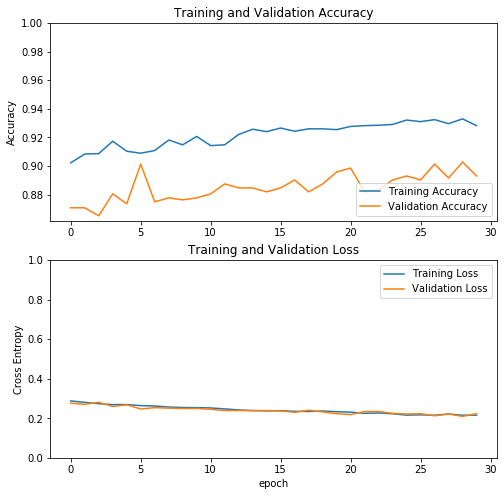

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

**Save trained model to disk in HDF5 format**

In [0]:
model.save('saved_model.h5')

**Load the saved model from disk**






In [0]:
import tensorflow as tf
model = tf.keras.models.load_model('saved_model.h5')

In [23]:
true_classes = train_generator.classes
print(true_classes)
class_labels = list(train_generator.class_indices.keys())   
print(class_labels)

[0 0 0 ... 1 1 1]
['grid_no_smoke', 'grid_smoke']


**Method to predict if the image has smoke or not**

In [0]:
def predict(model, image_path):
        IMAGE_SHAPE = (224, 224)
        import numpy as np
        import PIL.Image as Image

        image = Image.open(image_path) 
        image = image.resize(IMAGE_SHAPE)   
        image_data = np.array(image) / 255.0
        
        result = model.predict(image_data[np.newaxis, ...])
        
        result.shape
        print(result)

        predicted_class = np.argmax(result[0], axis=-1)
        print("{},{}".format(image_path, predicted_class))
        return predicted_class



**This is the method we will run to evaluate your saved model against our evaluation test dataset.**

Remember to include your saved model in HDF5 format (.h5) in your github repo. We will load your model and test it against our evaluation images.

In [25]:
import os
import csv


directory = 'grid_version/validation/grid_smoke/'
prediction_output_file = 'predictions.csv'

with open(prediction_output_file, mode='w') as predict_file:
    predict_writer = csv.writer(predict_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for filename in os.listdir(directory):
        if filename.endswith('.JPG') or filename.endswith('.jpg') or filename.endswith('.png'): 
            predicted = predict(model, os.path.join(directory, filename))
            predict_writer.writerow([filename, predicted])
            continue
        else:
            continue
        



[[0.6134211 0.3865789]]
grid_version/validation/grid_smoke/1529002700_+01740_05_04.png,0
[[0.53665715 0.46334288]]
grid_version/validation/grid_smoke/1529003240_+02280_05_03.png,0
[[0.76298594 0.23701404]]
grid_version/validation/grid_smoke/1499547163_+00900_05_05.png,0
[[0.6327013  0.36729872]]
grid_version/validation/grid_smoke/1512676384_+02400_05_04.png,0
[[0.9709942  0.02900583]]
grid_version/validation/grid_smoke/1498417833_+01440_05_08.png,0
[[0.51512176 0.4848783 ]]
grid_version/validation/grid_smoke/1530739705_+00660_05_08.png,0
[[0.44532815 0.5546718 ]]
grid_version/validation/grid_smoke/1528759746_+02340_05_06.png,1
[[0.39780727 0.60219276]]
grid_version/validation/grid_smoke/1529002160_+01200_05_03.png,1
[[0.7540243 0.2459757]]
grid_version/validation/grid_smoke/1512675904_+01920_05_05.png,0
[[0.45189917 0.5481008 ]]
grid_version/validation/grid_smoke/1529022265_+01560_05_05.png,1
[[0.7505131  0.24948692]]
grid_version/validation/grid_smoke/1499548543_+02280_03_06.png,0
[[0

In [26]:
!cat 'predictions.csv'

1529002700_+01740_05_04.png,0
1529003240_+02280_05_03.png,0
1499547163_+00900_05_05.png,0
1512676384_+02400_05_04.png,0
1498417833_+01440_05_08.png,0
1530739705_+00660_05_08.png,0
1528759746_+02340_05_06.png,1
1529002160_+01200_05_03.png,1
1512675904_+01920_05_05.png,0
1529022265_+01560_05_05.png,1
1499548543_+02280_03_06.png,0
1512675424_+01440_05_03.png,0
1529001860_+00900_06_03.png,1
1529022385_+01680_05_05.png,1
1499548063_+01800_04_09.png,0
1528759626_+02220_05_07.png,0
1529002400_+01440_06_03.png,0
1499548363_+02100_05_09.png,1
1499548003_+01740_05_05.png,0
1529001860_+00900_05_04.png,0
1529020945_+00240_05_05.png,1
1529001380_+00420_06_03.png,1
1530740605_+01560_05_08.png,0
1529002940_+01980_05_03.png,1
1529021965_+01260_05_05.png,0
1529002400_+01440_05_03.png,1
1499548183_+01920_04_07.png,0
1499547943_+01680_03_05.png,0
1528759806_+02400_05_08.png,0
1499547943_+01680_05_08.png,1
1528759686_+02280_06_04.png,0
1499547523_+01260_05_06.png,1
1528759206_+01800_05_08.png,0
1499547943